In [1]:
%matplotlib inline

In [39]:
#Importing the relevant dependencies
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
#Read the dataset into a variable and create the dataframe

####I think we have to import data using sk
cm_df = pd.read_csv("Churn_Modelling.csv")


In [4]:
cm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [50]:
#Renaming the Exited column to match its meaning with that of the original data.
cm_df.rename(columns={"Exited": "Stayed"}, inplace=True)
cm_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Stayed
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


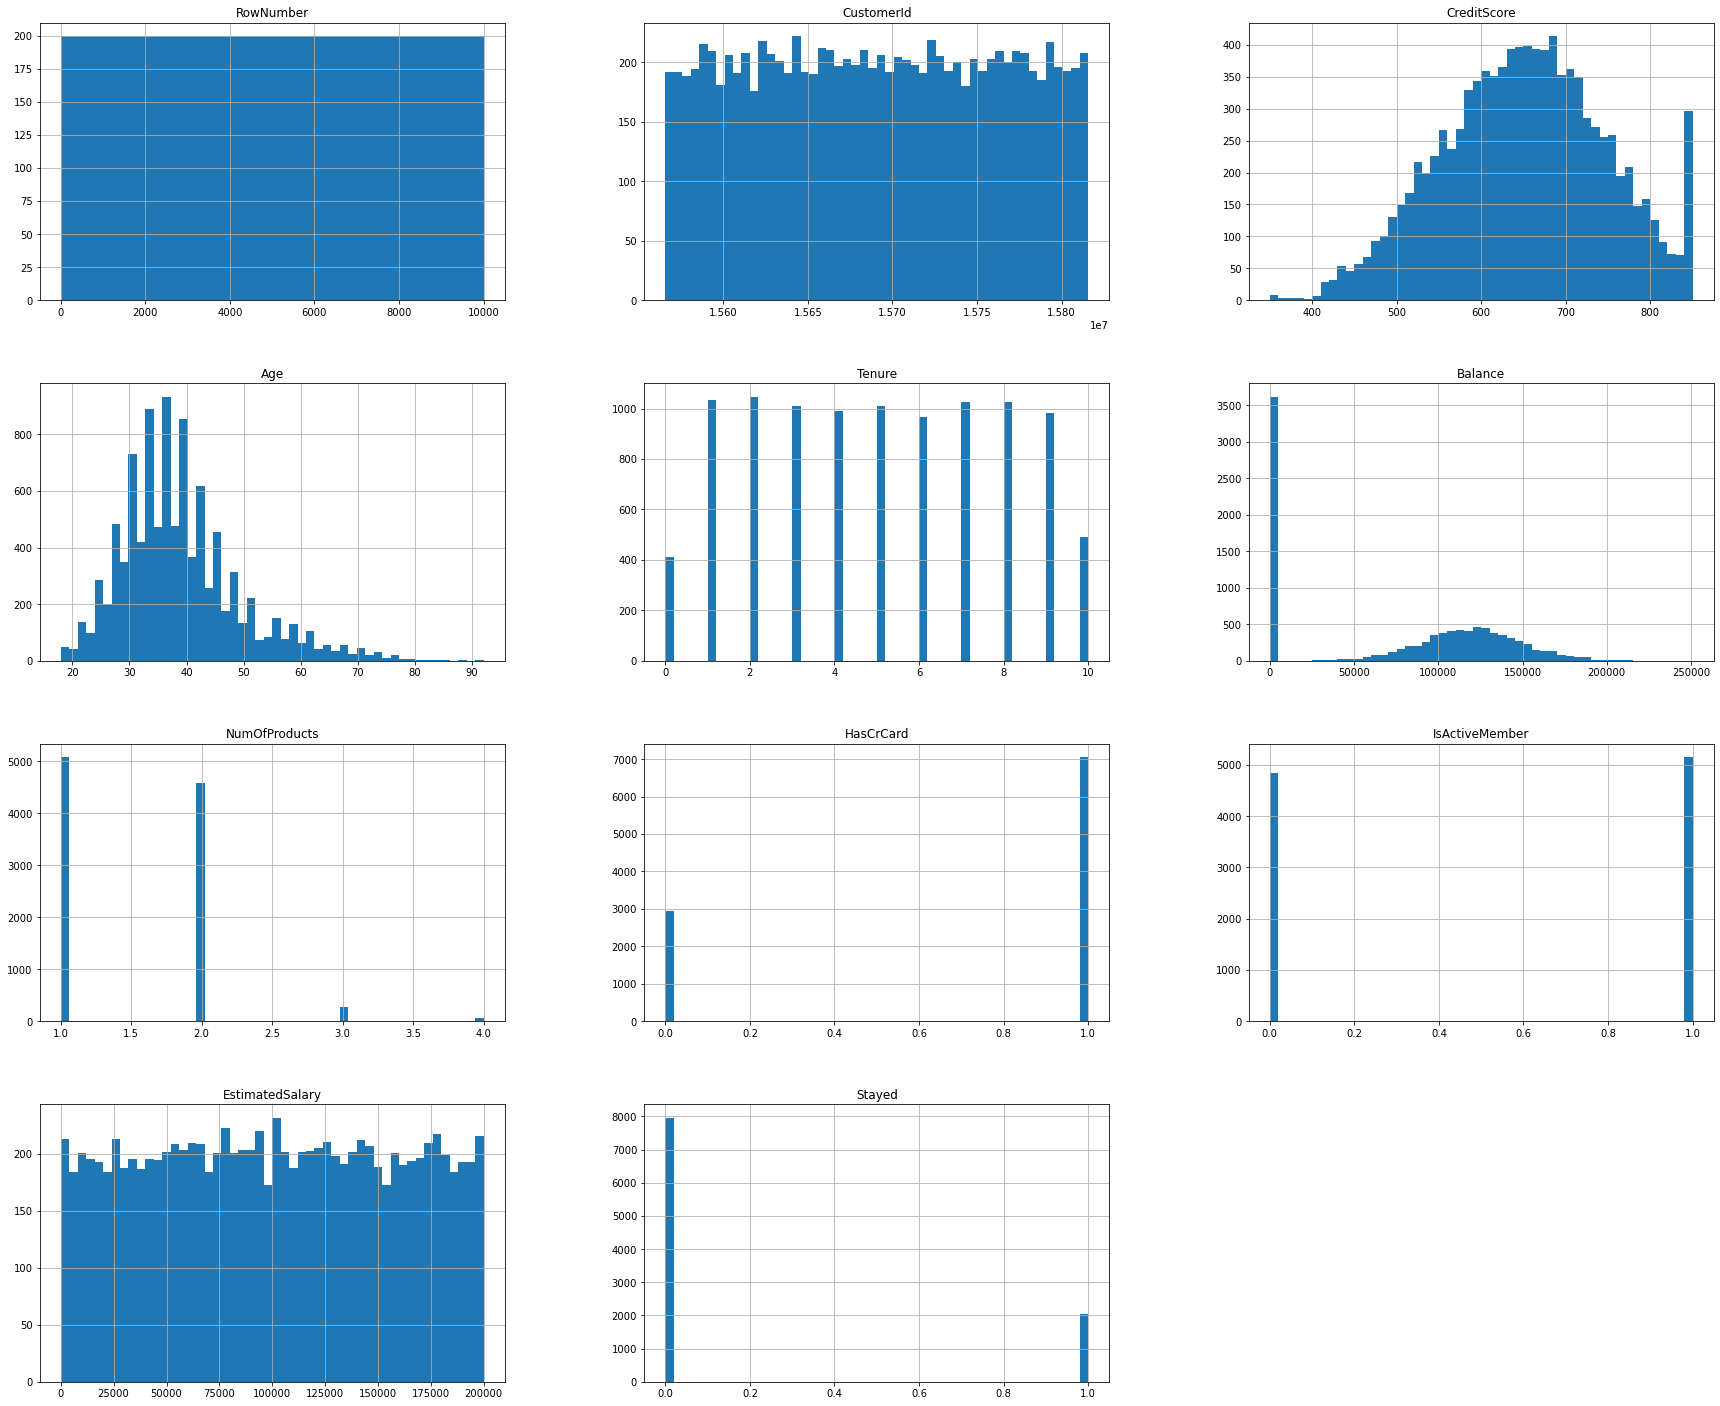

In [44]:
cm_df.hist(bins=50, figsize=(30,25)) 
plt.show()

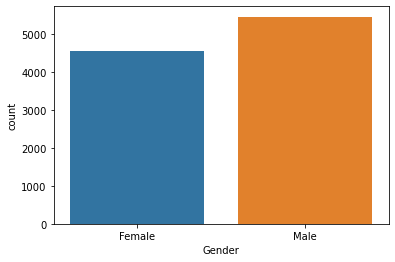

In [7]:
sns.countplot(x="Gender", data=cm_df)
plt.show()

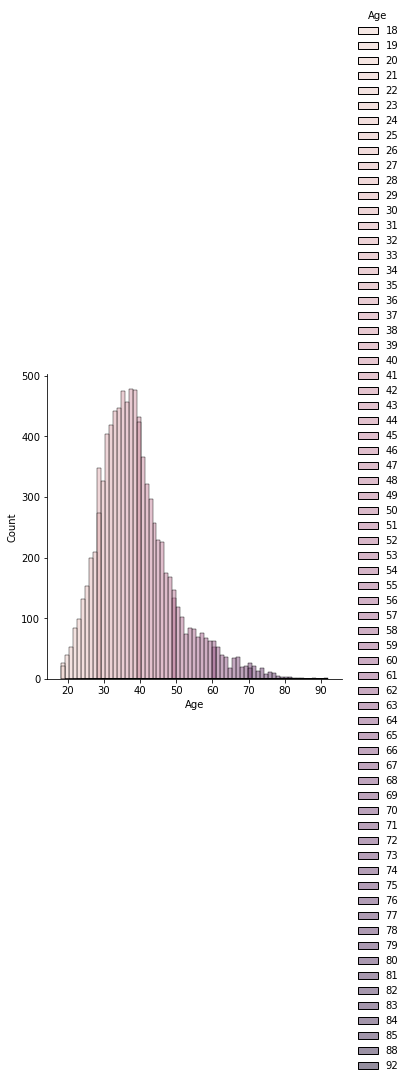

In [51]:
sns.displot(cm_df, x="Age", hue="Age")
plt.show()

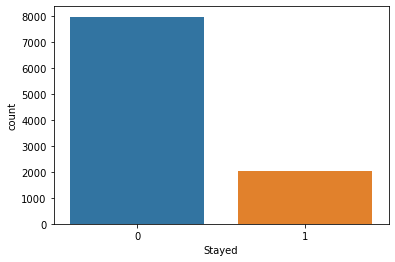

In [52]:
sns.countplot(x="Stayed", data=cm_df)
plt.show()

In [59]:
#cm_df['Stayed']= cm_df.target idk why this is not working
X=cm_df[['Balance']]
y=cm_df['Stayed']

In [60]:
# Create our Validation training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
# Create the Linear Regression model object
model = LinearRegression()

In [62]:
# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

In [63]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [7.6610542e-07]
y-axis intercept:  0.1471977383280999


In [64]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

# Score the model with the testing dataset
model.score(X_test, y_test)

0.01361893226916766

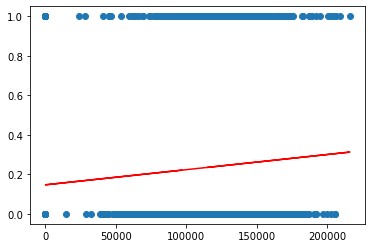

In [65]:
# Plot outputs
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')